In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X, y = datasets.load_boston(return_X_y = True)

In [ ]:
X.shape

(506, 13)

In [4]:
y = y.reshape(-1, 1)

In [5]:
data = np.concatenate((X, y), axis = 1)

In [ ]:
data.shape

(506, 14)

In [6]:
frame = pd.DataFrame(data)

In [ ]:
frame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
frame.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [ ]:
frame.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4b6768f10>,
      dtype=object)

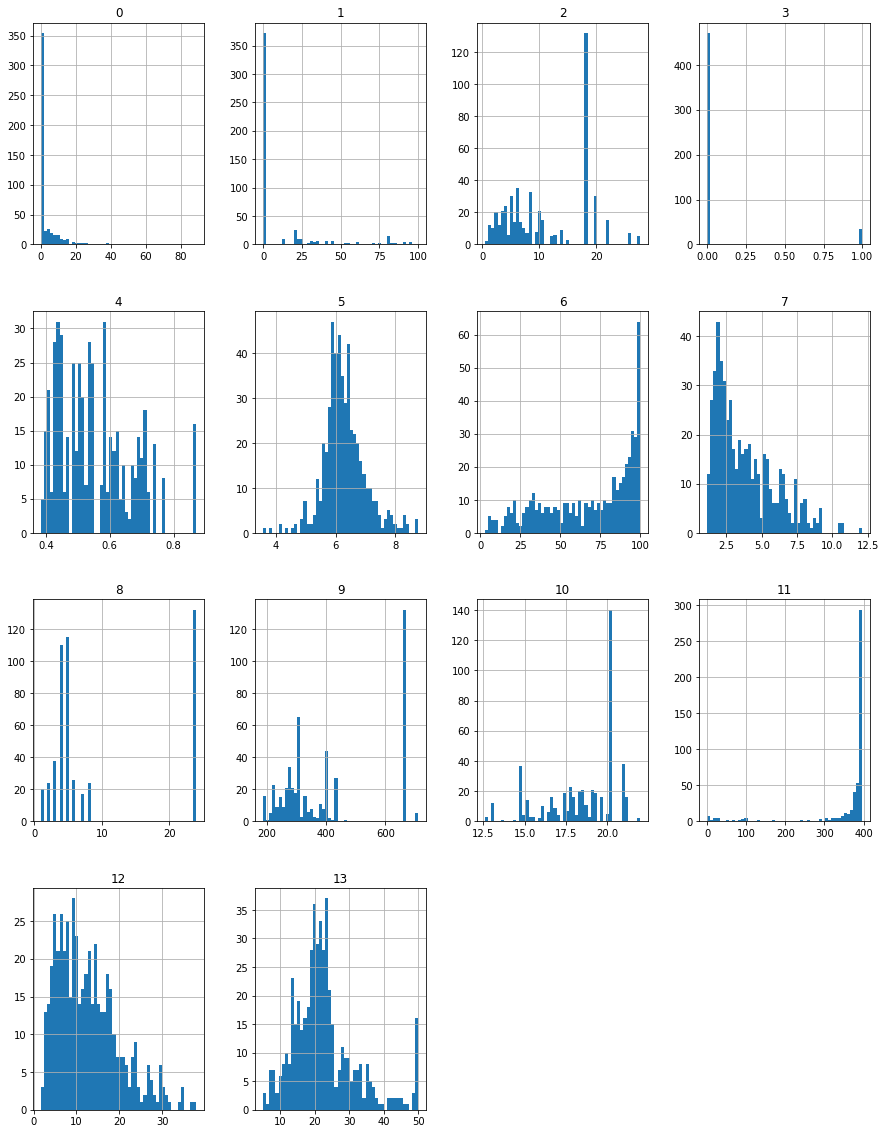

In [ ]:
frame.hist(bins = 50, figsize = (15, 20))

In [7]:
corr_matrix = frame.corr()
corr_matrix.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


In [ ]:
corr_matrix.iloc[13].sort_values(ascending = False)

13    1.000000
5     0.695360
1     0.360445
11    0.333461
7     0.249929
3     0.175260
6    -0.376955
8    -0.381626
0    -0.388305
4    -0.427321
9    -0.468536
2    -0.483725
10   -0.507787
12   -0.737663
Name: 13, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff64744a7d0>,
      dtype=object)

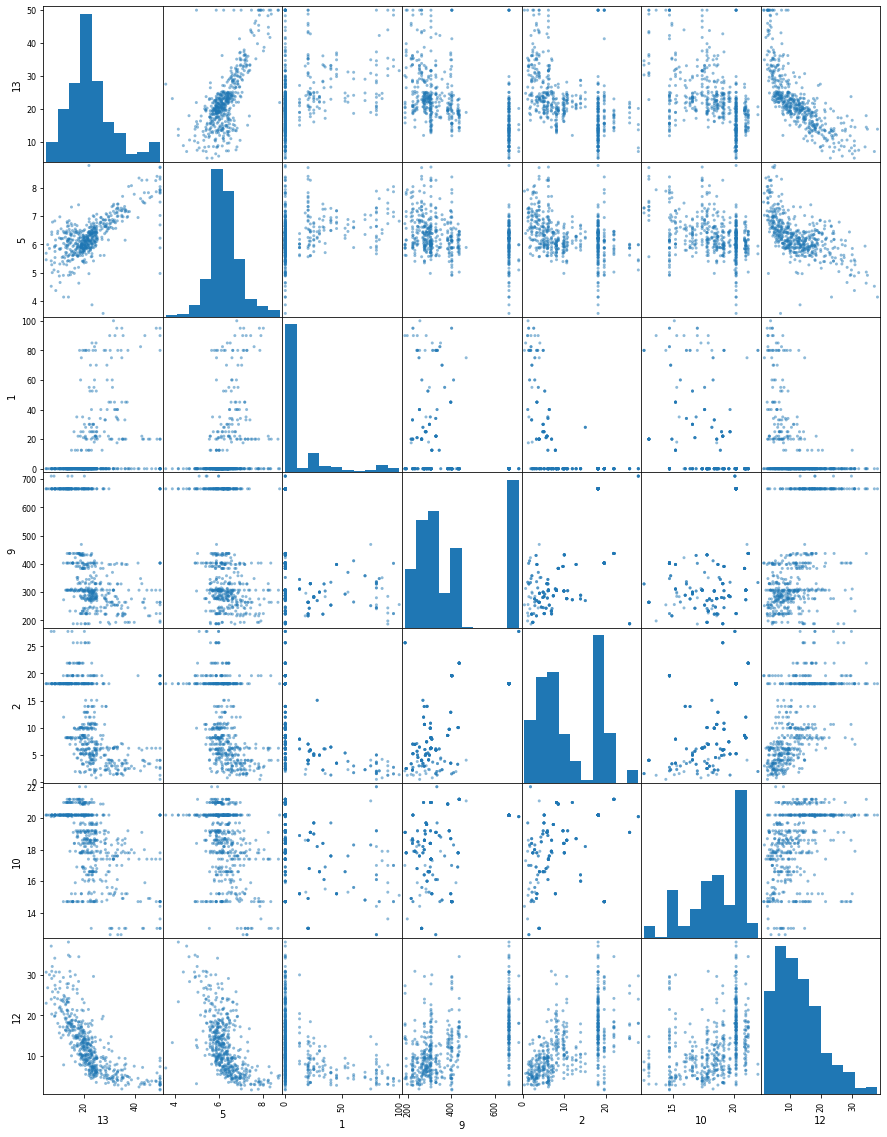

In [7]:
from pandas.plotting import scatter_matrix

attributes = [13, 5, 1, 9, 2, 10, 12]

scatter_matrix(frame[attributes], figsize = (15, 20))

In [8]:
frame[14] = pd.cut(frame[5], bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, np.inf],
                   labels = [1, 2, 3, 4, 5, 6, 7, 8, 9])

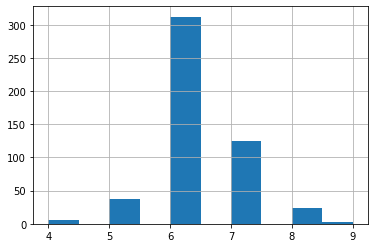

In [ ]:
frame[14].hist()

In [65]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

In [66]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(frame, frame[14]):
    strat_train_set = frame.loc[train_index]
    strat_test_set = frame.loc[test_index]

In [67]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop(14, axis = 1, inplace = True)

In [68]:
from sklearn.metrics import r2_score, mean_squared_error

In [69]:
class LinearRegression():
    def __init__(self, lr = 0.01, epochs = 10):
        """ Initialize model with learning rate
            and epochs."""
        self.lr = lr
        self.epochs = epochs

    def analytical_fit(self, x_train, y_train):
        """Fit the data using the analytical solution for linear regression."""
        assert x_train.shape[0] == y_train.shape[0]
        self.x = x_train # dimensions: (examples x (features + 1))
        self.y = y_train # dimensions: (examples x 1)
        self.w = np.random.randn(self.x.shape[1], 1)
        self.w = np.linalg.inv(self.x.T.dot(self.x)).dot(self.x.T).dot(self.y) # analytical solution = inv(xTx)xTy
                                                                               # dimensions: ((features + 1) x 1)

    def gd_fit(self, x_train, y_train, print_loss = False):
        """Fit the data using gradient descent."""
        m = x_train.shape[0]
        self.w = np.random.randn(x_train.shape[1], 1)
        print(self.w.shape)
        for i in range(self.epochs):
            fwd = self.predict(x_train).reshape(-1, 1)
            curr_w = self.w
            for j in range(self.w.shape[0]):
                # each x vector = (examples x 1)
                # weight is scalar
                # we calculate the fwd pass - y and then multiply by a particular feature x corresponding to that weight.
                diff = (fwd - y_train).reshape(-1, 1)

                dloss = (1 / m) * np.sum(np.multiply(diff, x_train[:, j].reshape(-1, 1)))

                curr_w[j] -= (self.lr * dloss)
            if print_loss:
                if (i + 1) % 100 == 0:
                    print(f"Epoch {i + 1} errors: ")
                    print_errors(self, x_train, y_train)
                    print("\n\n")
            self.w = curr_w
        print(self.w)

    def predict(self, x_test):
        """Predict data using given input and calculated weights."""
        preds = x_test.dot(self.w)  # dimensions: (examples x 1)
        return preds
    
    def errors(self, y_true, y_pred):
        r2score = r2_score(y_true, y_pred)
        rmse = mean_squared_error(y_true, y_pred, squared = False)
        mse = mean_squared_error(y_true, y_pred)
        return {'r2': r2score, 'rmse': rmse, 'mse': mse}
    
    @staticmethod
    def print_errors(model, x, y, return_preds = False):
        preds = model.predict(x)
        error = model.errors(y, preds)
        
        if return_preds:
            return preds
        
        
        print(f"R2 Score: {error['r2']}")
        print(f"RMSE: {error['rmse']}")
        print(f"MSE: {error['mse']}")

In [70]:
X_train = strat_train_set.drop(13, axis = 1)
y_train = strat_train_set[13]
X_test = strat_test_set.drop(13, axis = 1)
y_test = strat_test_set[13]

In [73]:
model = LinearRegression()
model.analytical_fit(X_train, y_train)

In [74]:
print_errors(model, X_train, y_train)

R2 Score: 0.6773754920426713
RMSE: 5.185008156018307
MSE: 26.884309577976357


In [75]:
print(X_test.shape)
print(y_test.shape)

(102, 13)
(102,)


In [76]:
print_errors(model, X_test, y_test)

R2 Score: 0.84248651408413
RMSE: 3.7375667711182383
MSE: 13.969405368567214


In [77]:
def plot_train_test(model):
    import matplotlib.patches as mpatches
    
    train_preds = print_errors(model, X_train, y_train, return_preds = True)
    
    plt.subplot(1, 2, 1)
    plt.scatter(X_train[5], y_train, color = "red", alpha = 0.5)
    plt.scatter(X_train[5], train_preds, color = "blue", alpha = 0.5)
    plt.title("Training Fit")
    plt.xlabel("5")
    plt.ylabel("13")
    red_patch = mpatches.Patch(color = "red", label = "True")
    blue_patch = mpatches.Patch(color = "blue", label = "Predicted")
    plt.legend(handles=[red_patch, blue_patch])
               
    test_preds = print_errors(model, X_test, y_test, return_preds = True)

    plt.subplot(1, 2, 2)
    plt.scatter(X_test[5], y_test, color = "red", alpha = 0.5)
    plt.scatter(X_test[5], test_preds, color = "blue", alpha = 0.5)
    plt.title("Test")
    plt.xlabel("5")
    plt.ylabel("13")
    red_patch = mpatches.Patch(color = "red", label = "True")
    blue_patch = mpatches.Patch(color = "blue", label = "Predicted")
    plt.legend(handles=[red_patch, blue_patch])
    plt.show()

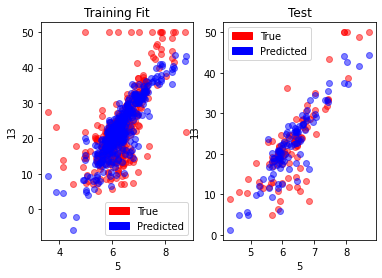

In [52]:
plot_train_test(model)

Looks..... weird?

I have to make some changes so it can accept DataFrame objects. WORKS FOR NUMPY ARRAYS THO!


In [23]:
gd_model = LinearRegression(epochs = 10)
gd_model.gd_fit(X_train, y_train)

(13, 1)


AttributeError: ignored

### Generating dataset from weights (To test model)

In [79]:
fixed_weights = np.array([1, 2, 3, 4, 5]).T.reshape(-1, 1)
fixed_weights

array([[1],
       [2],
       [3],
       [4],
       [5]])

###### Generating 500 X and y values by forming random (1, 5) vectors of X and multiplying with weights for y vector

In [80]:
x = []
y = []
for i in range(500):
    x0 = np.random.randn(1, fixed_weights.shape[0])
    x.append(x0)
    y0 = x0.dot(fixed_weights)
    y.append(y0)
assert(x[5].dot(fixed_weights) == y[5])

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [82]:
x_train = np.asarray(x_train).reshape(-1, fixed_weights.shape[0])
y_train = np.asarray(y_train).reshape(-1, 1)

In [83]:
sol_model = LinearRegression(epochs = 10)
sol_model.analytical_fit(x_train, y_train)

In [84]:
sol_model.w

array([[1.],
       [2.],
       [3.],
       [4.],
       [5.]])

##### Analytical solution is perfect!!! ^^^^

In [85]:
gd_model = LinearRegression(epochs = 300)
gd_model.gd_fit(x_train, y_train, print_loss = True)

(5, 1)
Epoch 100 errors: 
R2 Score: 0.9000972899787173
RMSE: 2.3131917418412606
MSE: 5.3508560345226055



Epoch 200 errors: 
R2 Score: 0.9867762995516192
RMSE: 0.8415879332572943
MSE: 0.7082702494042841



Epoch 300 errors: 
R2 Score: 0.998177289904592
RMSE: 0.31245091299469674
MSE: 0.09762557303121956



[[0.97372505]
 [1.93469423]
 [2.83368162]
 [3.84845925]
 [4.78656672]]


HOLY SHIT SO CLOSE skfldlsjfs ITS DONE

